In [52]:
### Import libraries
import pandas as pd # primary data structure library
import numpy as np

# Downloading Data 

In [2]:
! git clone https://github.com/CSSEGISandData/COVID-19.git

Cloning into 'COVID-19'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 51003 (delta 16), reused 24 (delta 13), pack-reused 50973
Receiving objects: 100% (51003/51003), 403.41 MiB | 29.93 MiB/s, done.
Resolving deltas: 100% (31947/31947), done.
Checking out files: 100% (612/612), done.


This data is collected from repository for the 2019 Novel Coronavirus Visual Dashboard operated by the Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE).https://github.com/CSSEGISandData/COVID-19

In [3]:
### Select yesterday date as report provide figures for the day before
#from datetime import date, timedelta
#file_date = str((date.today() - timedelta(days = 1)).strftime('%m-%d-%Y'))

### Select data path
fullpath1= '/content/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'

df1 = pd.read_csv(fullpath1, error_bad_lines=False)

fullpath2 = '/content/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

df2 = pd.read_csv(fullpath2, error_bad_lines=False)



# Exploring Data

In [95]:
df1.shape

(3340, 243)

view the dataframe

In [4]:
df1.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,...,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,"Autauga, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,988,1010,1024,1030,1030,1050,1065,1086,1169,1174,1162,1188,1196,1196,1206,1218,1219,1235,1241,1240,1255,1264,1266,1286,1286,1281,1284,1296,1309,1345,1348,1354,1345,1349,1355,1371,1377,1383,1385,1398
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,"Baldwin, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3095,3175,3210,3263,3322,3380,3443,3502,3544,3651,3670,3710,3744,3791,3839,3877,3888,3906,3931,3957,3997,4037,4069,4083,4100,4166,4199,4230,4307,4402,4422,4445,4458,4495,4513,4542,4569,4586,4609,4639
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,"Barbour, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,554,562,563,563,564,565,569,573,575,576,579,581,586,590,598,604,605,606,613,619,622,626,629,633,628,616,614,620,624,628,628,629,617,614,616,616,616,617,617,618
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,"Bibb, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,360,364,374,381,384,413,416,426,438,442,444,453,457,465,469,469,474,476,490,494,501,503,510,510,511,513,515,517,523,533,535,538,541,542,545,550,555,557,562,564
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,"Blount, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,704,722,736,741,745,759,774,788,800,812,816,825,835,848,854,860,863,887,901,912,930,931,934,946,967,968,979,983,1004,1025,1034,1045,1036,1037,1049,1062,1065,1070,1071,1082


How to find out the columns?

In [5]:
df1.columns

Index(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
       'Country_Region', 'Lat', 'Long_',
       ...
       '8/31/20', '9/1/20', '9/2/20', '9/3/20', '9/4/20', '9/5/20', '9/6/20',
       '9/7/20', '9/8/20', '9/9/20'],
      dtype='object', length=243)

In [6]:
df1.tail()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,...,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20
3335,84056039,US,USA,840,56039.0,Teton,Wyoming,US,43.935225,-110.589080,"Teton, Wyoming, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,348,354,358,362,363,367,371,370,374,370,372,373,375,383,385,389,390,393,394,398,399,401,409,409,412,417,417,424,425,429,430,430,433,435,440,440,447,447,450,451
3336,84056041,US,USA,840,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,"Uinta, Wyoming, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,259,262,265,267,268,272,274,274,278,277,279,278,278,277,276,276,277,278,283,283,283,283,283,283,283,289,289,292,292,295,298,301,303,305,308,308,308,308,309,308
3337,84090056,US,USA,840,90056.0,Unassigned,Wyoming,US,0.000000,0.000000,"Unassigned, Wyoming, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,53,53,73,73,73,73,0,0,0,0,0,0,0,0
3338,84056043,US,USA,840,56043.0,Washakie,Wyoming,US,43.904516,-107.680187,"Washakie, Wyoming, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,49,49,49,54,58,59,69,70,77,77,79,82,86,96,97,97,100,102,104,106,106,107,108,108,108,108,108,108,108,108,108,108,109,109,110,110,111,111,111,111
3339,84056045,US,USA,840,56045.0,Weston,Wyoming,US,43.839612,-104.567488,"Weston, Wyoming, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,5,5,5,5,5,5,5,5,5,6,5,5,5,5,7,7,8,8,12,0,11,11,11,11,11,11,11,11,11,11,11,11,19,20,20,20,20,20,20,21


How to find out dataframe dimensions

In [7]:
print ('dataframe dimensions:', df1.shape)

dataframe dimensions: (3340, 243)


How many "province states" are there in this data set?

In [ ]:
df1.Province_State.unique()

array(['Alabama', 'Alaska', 'American Samoa', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'Diamond Princess', 'District of Columbia', 'Florida', 'Georgia',
       'Grand Princess', 'Guam', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Northern Mariana Islands', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Vermont', 'Virgin Islands', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [8]:
len(df1.Province_State.unique())

58

In [9]:
#df1.max #?

<bound method DataFrame.max of            UID iso2 iso3  code3  ...  9/6/20 9/7/20 9/8/20 9/9/20
0     84001001   US  USA    840  ...    1377   1383   1385   1398
1     84001003   US  USA    840  ...    4569   4586   4609   4639
2     84001005   US  USA    840  ...     616    617    617    618
3     84001007   US  USA    840  ...     555    557    562    564
4     84001009   US  USA    840  ...    1065   1070   1071   1082
...        ...  ...  ...    ...  ...     ...    ...    ...    ...
3335  84056039   US  USA    840  ...     447    447    450    451
3336  84056041   US  USA    840  ...     308    308    309    308
3337  84090056   US  USA    840  ...       0      0      0      0
3338  84056043   US  USA    840  ...     111    111    111    111
3339  84056045   US  USA    840  ...      20     20     20     21

[3340 rows x 243 columns]>

In [88]:
from matplotlib import pyplot
df1t.plot
pyplot.show()


Find out the largest value for column '9/8/20'

In [10]:
df1["9/8/20"].max()

249241

Find out which row has the largest value on '9/8/20'

1/22/20         0
1/23/20         0
1/24/20         0
1/25/20         0
1/26/20         1
            ...  
9/5/20     247542
9/6/20     248334
9/7/20     248821
9/8/20     249241
9/9/20     249859
Name: 213, Length: 232, dtype: object


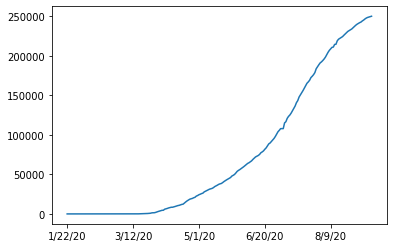

In [111]:
df1.loc[df1['9/8/20']==249241]
LA = df1.iloc[213, 11:]
type(LA)
print(LA)
LA.plot()

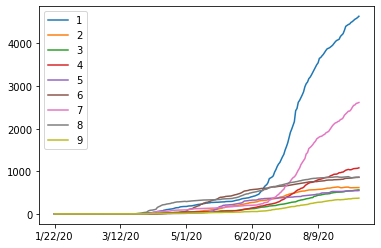

In [103]:
UScases = df1.iloc[1:10, 11:].transpose()
#df1b = df1.groupby(['Province_State'])
#df1b.head()
UScases.plot()

Examine the row with the largest value on 9/8/2020

In [14]:
subset = df1.loc[df1['9/8/20']==249241]

In [83]:
subset = subset.transpose()
subset = subset.iloc[:][11:]
type(subset)

pandas.core.frame.DataFrame

In [42]:
type(subset)

pandas.core.frame.DataFrame

In [36]:
from datetime import datetime

#datetime.strptime( '9/8/20', '%m/%d/%y') 

dates = [datetime.strptime( x, '%m/%d/%y') for x in subset.columns[11:]]
print(dates)

[datetime.datetime(2020, 1, 22, 0, 0), datetime.datetime(2020, 1, 23, 0, 0), datetime.datetime(2020, 1, 24, 0, 0), datetime.datetime(2020, 1, 25, 0, 0), datetime.datetime(2020, 1, 26, 0, 0), datetime.datetime(2020, 1, 27, 0, 0), datetime.datetime(2020, 1, 28, 0, 0), datetime.datetime(2020, 1, 29, 0, 0), datetime.datetime(2020, 1, 30, 0, 0), datetime.datetime(2020, 1, 31, 0, 0), datetime.datetime(2020, 2, 1, 0, 0), datetime.datetime(2020, 2, 2, 0, 0), datetime.datetime(2020, 2, 3, 0, 0), datetime.datetime(2020, 2, 4, 0, 0), datetime.datetime(2020, 2, 5, 0, 0), datetime.datetime(2020, 2, 6, 0, 0), datetime.datetime(2020, 2, 7, 0, 0), datetime.datetime(2020, 2, 8, 0, 0), datetime.datetime(2020, 2, 9, 0, 0), datetime.datetime(2020, 2, 10, 0, 0), datetime.datetime(2020, 2, 11, 0, 0), datetime.datetime(2020, 2, 12, 0, 0), datetime.datetime(2020, 2, 13, 0, 0), datetime.datetime(2020, 2, 14, 0, 0), datetime.datetime(2020, 2, 15, 0, 0), datetime.datetime(2020, 2, 16, 0, 0), datetime.datetime(20

In [61]:
import matplotlib.pyplot as plt
plt.plot(dates,  list(subset.loc[:][11:])))
#plt.ylabel('some numbers')
#plt.show()

SyntaxError: ignored

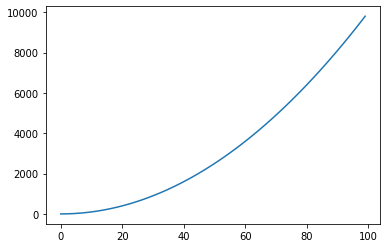

In [55]:
x = np.array(range(100))
y = x**2
plt.plot(x, y)


In [ ]:
sorted_df1 = (df1.sort_values(by=['UID'])) 
cases = () cases = sorted_df1['UID'] print(cases[-1])

SyntaxError: ignored

In [ ]:
df1.iloc.describe

<bound method NDFrame.describe of            UID iso2 iso3  code3  ...  9/5/20 9/6/20 9/7/20 9/8/20
0     84001001   US  USA    840  ...    1371   1377   1383   1385
1     84001003   US  USA    840  ...    4542   4569   4586   4609
2     84001005   US  USA    840  ...     616    616    617    617
3     84001007   US  USA    840  ...     550    555    557    562
4     84001009   US  USA    840  ...    1062   1065   1070   1071
...        ...  ...  ...    ...  ...     ...    ...    ...    ...
3335  84056039   US  USA    840  ...     440    447    447    450
3336  84056041   US  USA    840  ...     308    308    308    309
3337  84090056   US  USA    840  ...       0      0      0      0
3338  84056043   US  USA    840  ...     110    111    111    111
3339  84056045   US  USA    840  ...      20     20     20     20

[3340 rows x 242 columns]>

In [ ]:
df1.loc[ :, ['9/6/20', '9/7/20', '9/8/20']]

,9/6/20,9/7/20,9/8/20
0,1377,1383,1385
1,4569,4586,4609
2,616,617,617
3,555,557,562
4,1065,1070,1071
...,...,...,...
3335,447,447,450
3336,308,308,309
3337,0,0,0
3338,111,111,111


In [ ]:
df1.iloc[0, -20:-1 ]

8/20/20    1240
8/21/20    1255
8/22/20    1264
8/23/20    1266
8/24/20    1286
8/25/20    1286
8/26/20    1281
8/27/20    1284
8/28/20    1296
8/29/20    1309
8/30/20    1345
8/31/20    1348
9/1/20     1354
9/2/20     1345
9/3/20     1349
9/4/20     1355
9/5/20     1371
9/6/20     1377
9/7/20     1383
Name: 0, dtype: object

# Explore Data 

In [ ]:
df['Province_State']
list(df['Province_State'].unique())

['Alabama',
 'Alaska',
 'American Samoa',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'Diamond Princess',
 'District of Columbia',
 'Florida',
 'Georgia',
 'Grand Princess',
 'Guam',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'North Dakota',
 'Northern Mariana Islands',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Puerto Rico',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Vermont',
 'Virgin Islands',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin',
 'Wyoming']

In [ ]:
type(df['Province_State'])

pandas.core.series.Series

In [ ]:
#dir(df['Province_State'])

In [ ]:
df['Province_State'].unique()

array(['Alabama', 'Alaska', 'American Samoa', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'Diamond Princess', 'District of Columbia', 'Florida', 'Georgia',
       'Grand Princess', 'Guam', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Northern Mariana Islands', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Vermont', 'Virgin Islands', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [ ]:
df2.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,36675,36710,36710,36747,36782,36829,36896,37015,37054,37054,37162,37269,37345,37424,37431,37551,37596,37599,37599,37599,37856,37894,37953,37999,38054,38070,38113,38129,38140,38143,38162,38165,38196,38243,38288,38304,38324,38398,38494,38520
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,5276,5396,5519,5620,5750,5889,6016,6151,6275,6411,6536,6676,6817,6971,7117,7260,7380,7499,7654,7812,7967,8119,8275,8427,8605,8759,8927,9083,9195,9279,9380,9513,9606,9728,9844,9967,10102,10255,10406,10553
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,30394,30950,31465,31972,32504,33055,33626,34155,34693,35160,35712,36204,36699,37187,37664,38133,38583,39025,39444,39847,40258,40667,41068,41460,41858,42228,42619,43016,43403,43781,44146,44494,44833,45158,45469,45773,46071,46364,46653,46938
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,925,925,925,937,939,939,944,955,955,955,963,963,977,981,989,989,989,1005,1005,1024,1024,1045,1045,1045,1060,1060,1098,1098,1124,1124,1124,1176,1184,1199,1199,1215,1215,1215,1261,1261
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1148,1164,1199,1280,1344,1395,1483,1538,1572,1672,1679,1735,1762,1815,1852,1879,1906,1935,1966,2015,2044,2068,2134,2171,2222,2283,2332,2415,2471,2551,2624,2654,2729,2777,2805,2876,2935,2965,2981,3033


In [ ]:
df2.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,...,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20
count,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,...,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02
mean,21.076624,22.829441,2.086466,2.458647,3.537594,5.390977,7.962406,11.003759,20.969925,23.180451,30.954887,37.315789,45.255639,63.109023,74.763158,89.842105,103.921053,115.796992,129.304511,139.582707,150.973684,160.781955,168.458647,170.030075,226.996241,251.533835,259.586466,267.796992,275.447368,282.522556,284.402256,286.507519,288.872180,295.492481,296.921053,299.041353,302.248120,305.921053,311.033835,316.240602,...,6.615248e+04,6.709614e+04,6.795759e+04,6.871721e+04,6.968994e+04,7.070960e+04,7.178158e+04,7.283764e+04,7.381407e+04,7.465711e+04,7.551233e+04,7.647033e+04,7.751193e+04,7.858693e+04,7.973111e+04,8.066476e+04,8.146382e+04,8.224989e+04,8.321308e+04,8.424140e+04,8.524560e+04,8.626335e+04,8.726152e+04,8.803574e+04,8.888667e+04,8.979656e+04,9.087874e+04,9.192836e+04,9.298665e+04,9.397164e+04,9.482221e+04,9.580739e+04,9.680317e+04,9.786244e+04,9.889044e+04,1.000676e+05,1.010584e+05,1.018942e+05,1.027735e+05,1.036494e+05
std,24.904600,70.191330,27.279200,27.377862,34.083035,47.434934,66.289178,89.313757,219.187744,220.524977,303.897894,360.297673,443.366813,689.035590,832.953418,1026.582242,1209.754647,1359.927896,1534.122760,1665.831961,1820.905815,1949.402861,2049.809414,2050.149390,2958.034534,3337.708666,3450.661369,3569.103387,3679.809248,3783.531445,3804.941211,3830.105321,3843.654801,3930.735156,3930.773058,3943.282630,3973.896751,3998.654470,4024.279270,4044.748524,...,3.475852e+05,3.528790e+05,3.571257e+05,3.609416e+05,3.663504e+05,3.717965e+05,3.776100e+05,3.832570e+05,3.888223e+05,3.931862e+05,3.974734e+05,4.026420e+05,4.084647e+05,4.142181e+05,4.203601e+05,4.253771e+05,4.294794e+05,4.331231e+05,4.382516e+05,4.436425e+05,4.488150e+05,4.538117e+05,4.591654e+05,4.630888e+05,4.670401e+05,4.717421e+05,4.774628e+05,4.829940e+05,4.885157e+05,4.940581e+05,4.983687e+05,5.033069e+05,5.087607e+05,5.143561e+05,5.197116e+05,5.260300e+05,5.316019e+05,5.361459e+05,5.399441e+05,5.442783e+05
min,-51.796300,-135.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000

In [ ]:
### Check if the dataframe contains NaN values
df2.isna().any()

Province/State     True
Country/Region    False
Lat               False
Long              False
1/22/20           False
                  ...  
9/3/20            False
9/4/20            False
9/5/20            False
9/6/20            False
9/7/20            False
Length: 234, dtype: bool

In [ ]:
# Countries affected
countries = df2['Country/Region'].unique().tolist()
print("\nTotal countries affected by virus: ",len(countries))
print(countries)


Total countries affected by virus:  188
['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark', 'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Holy See', 'Honduras'